<a href="https://colab.research.google.com/github/Ishita95-harvad/Global-Development-Full-Analysis-2000-2020-/blob/main/Global_Development_Full_Analysis_(2000_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Development Full Analysis (2000-2020)**
Global Economic, Environmental, Health, and Social indicators Ready for Analysisv

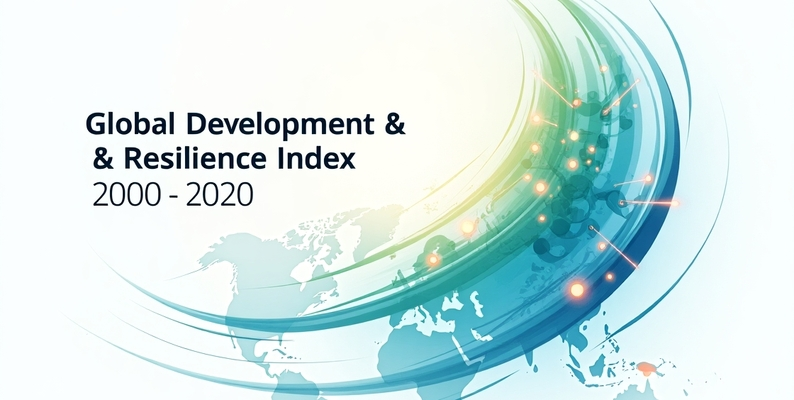



---



# Task
execute

Here is all the data you need:
"Global_Development_Indicators_2000_2020.csv"

## Data loading

### Subtask:
Load the "Global_Development_Indicators_2000_2020.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Global_Development_Indicators_2000_2020.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Global_Development_Indicators_2000_2020.csv' not found.")
    df = None

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types of columns, and the distribution of key variables.


**Reasoning**:
I need to explore the data, including its shape, data types, summary statistics, unique values in categorical columns, missing values, and distributions of key numerical variables.



Shape of the DataFrame: (5556, 47)

Data Types:
 year                                     int64
country_code                            object
country_name                            object
region                                  object
income_group                            object
currency_unit                           object
gdp_usd                                float64
population                             float64
gdp_per_capita                         float64
inflation_rate                         float64
unemployment_rate                      float64
fdi_pct_gdp                            float64
co2_emissions_kt                       float64
energy_use_per_capita                  float64
renewable_energy_pct                   float64
forest_area_pct                        float64
electricity_access_pct                 float64
life_expectancy                        float64
child_mortality                        float64
school_enrollment_secondary            float64
health_expe

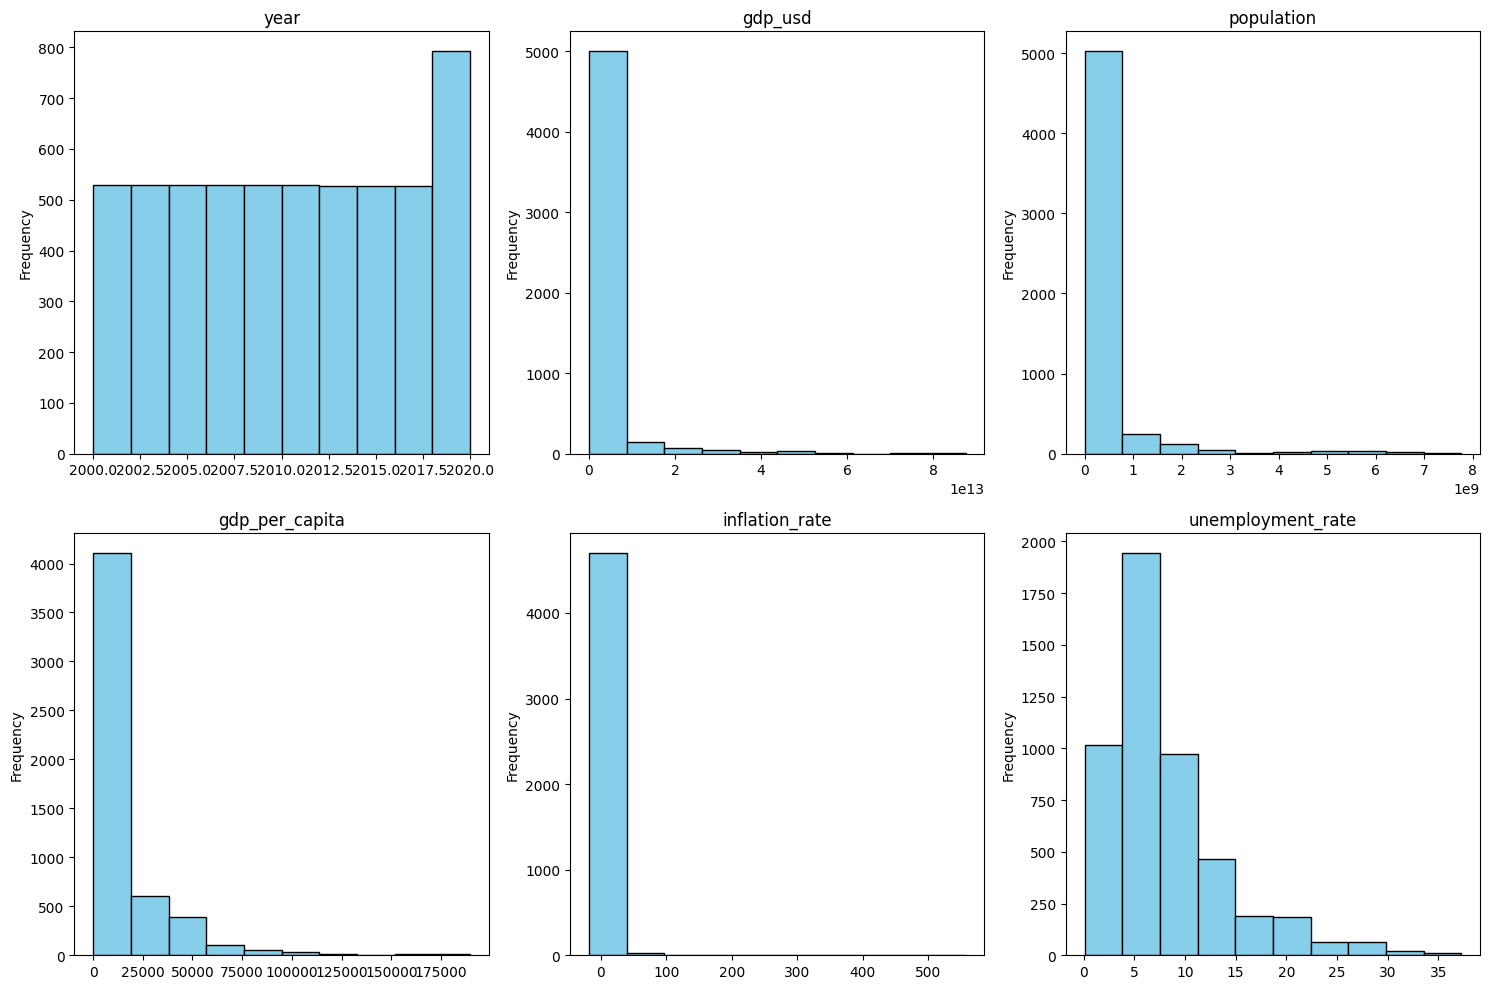

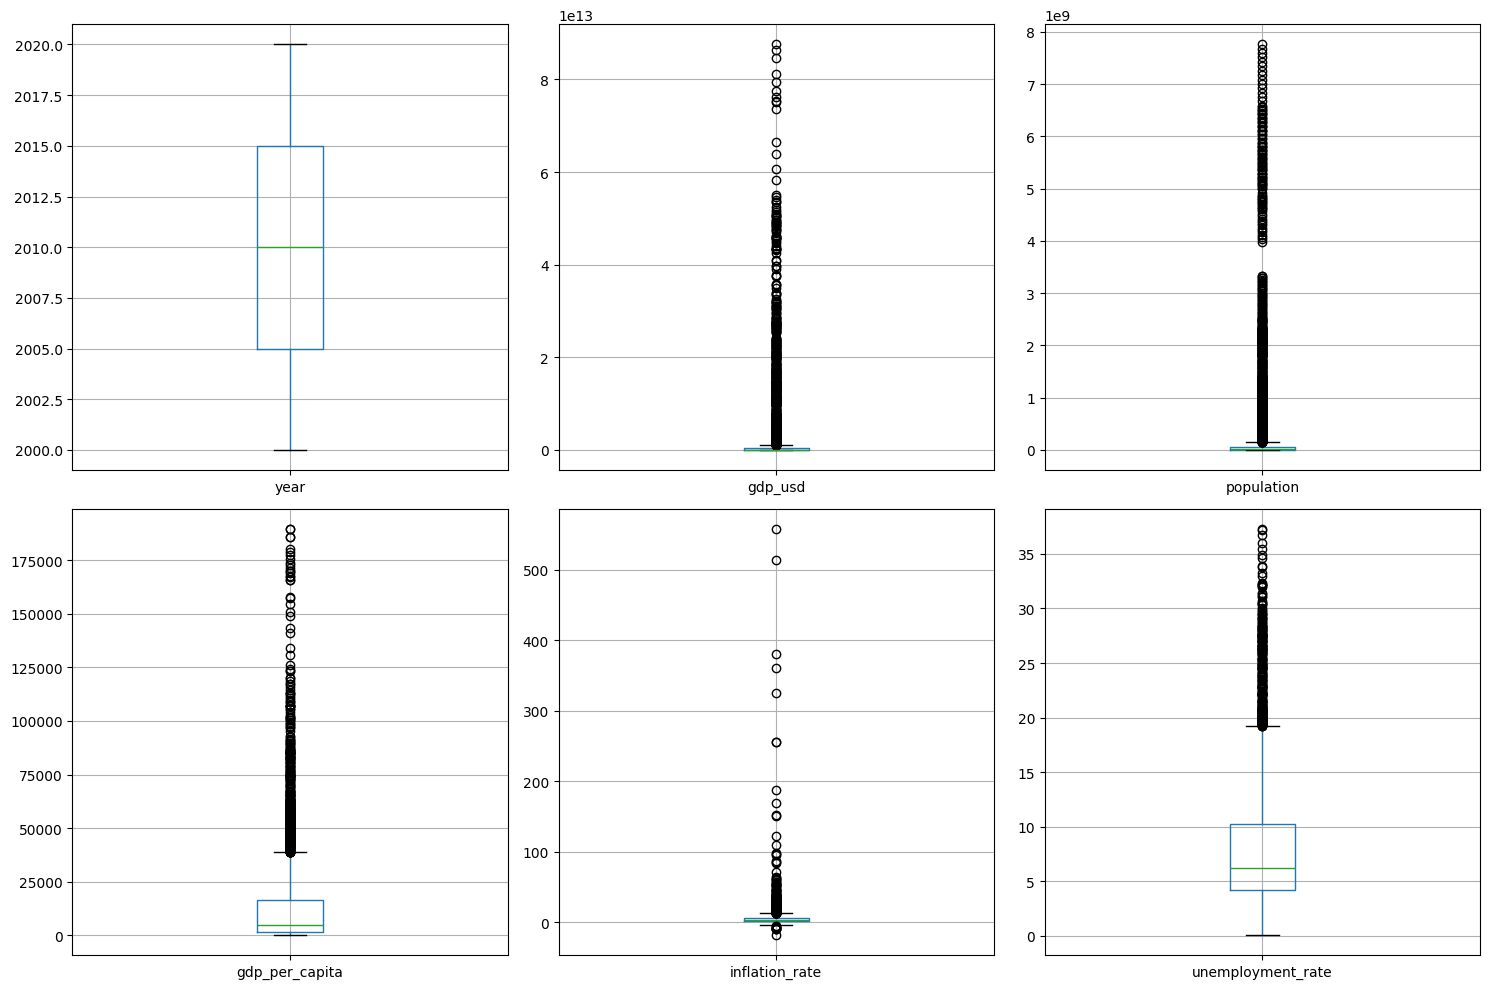

In [2]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types and identify inconsistencies
print("\nData Types:\n", df.dtypes)

# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())

# Explore categorical columns
for col in df.select_dtypes(include=['object']):
    print(f"\nColumn: {col}")
    print("Number of unique values:", df[col].nunique())
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts())

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Visualize distributions of key numerical variables
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['number']).columns
num_cols_to_plot = min(len(numerical_cols), 6)  # Limit to 6 plots for better visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols[:num_cols_to_plot]):
    df[col].plot(kind='hist', ax=axes[i], title=col, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols[:num_cols_to_plot]):
    df.boxplot(column=col, ax=axes[i])
plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicate rows.


**Reasoning**:
Impute missing values in numerical columns with the median and in categorical columns with the mode, then remove duplicate rows.



In [3]:
# Impute missing values
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicate rows
print("Shape of the DataFrame before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of the DataFrame after removing duplicates:", df.shape)

# Verify the cleaning
missing_values_after = df.isnull().sum().sum()
duplicate_rows_after = df.duplicated().sum()
print("\nNumber of missing values after cleaning:", missing_values_after)
print("Number of duplicate rows after cleaning:", duplicate_rows_after)

Shape of the DataFrame before removing duplicates: (5556, 47)
Shape of the DataFrame after removing duplicates: (5556, 47)

Number of missing values after cleaning: 0
Number of duplicate rows after cleaning: 0


## Data wrangling

### Subtask:
Data Wrangling: Convert data types and create new features.


**Reasoning**:
Convert the 'year' column to integer type and create new features like growth rates and ratios of relevant indicators. Handle potential errors during type conversion and calculations.



In [4]:
# Convert 'year' column to integer
try:
    df['year'] = df['year'].astype('int64')
except ValueError as e:
    print(f"Error converting 'year' column: {e}")
    # Handle the error, e.g., replace non-numeric values with NaN and then convert
    # df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')


# Create new features
# Example: GDP growth rate
df['gdp_growth_rate'] = df.groupby('country_code')['gdp_usd'].pct_change() * 100

# Example: Ratio of health expenditure to GDP
df['health_expenditure_gdp_ratio'] = df['health_expenditure_pct_gdp'] / 100

# Example: Ratio of CO2 emissions to GDP
df['co2_emissions_gdp_ratio'] = df['co2_emissions_kt'] / df['gdp_usd']

# Handle potential errors like division by zero
df['co2_emissions_gdp_ratio'].replace([float('inf'), float('-inf')], 0, inplace=True)
df['co2_emissions_gdp_ratio'].fillna(0, inplace=True)

# Display the updated DataFrame
display(df.head())

<ipython-input-4-36c010ddd263>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['co2_emissions_gdp_ratio'].replace([float('inf'), float('-inf')], 0, inplace=True)
<ipython-input-4-36c010ddd263>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index,gdp_growth_rate,health_expenditure_gdp_ratio,co2_emissions_gdp_ratio
0,2000,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,2.839525e+11,398113044.0,713.245921,8.601485,...,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733,NaN,0.062524,0.000001
1,2001,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,2.588432e+11,408522129.0,633.608789,5.840354,...,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762,-8.842779,0.063906,0.000002
2,2002,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,2.648950e+11,419223717.0,631.870340,8.763752,...,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528,2.338026,0.059694,0.000002
3,2003,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,3.526921e+11,430246635.0,819.743981,7.449700,...,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578,33.144093,0.066357,0.000001
4,2004,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,4.388756e+11,441630149.0,993.762711,5.023421,...,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022,24.435900,0.067107,0.000001


**Reasoning**:
Fix the chained assignment warnings and complete the subtask.



In [5]:
# Convert 'year' column to integer
try:
    df['year'] = df['year'].astype('int64')
except ValueError as e:
    print(f"Error converting 'year' column: {e}")
    # Handle the error, e.g., replace non-numeric values with NaN and then convert
    # df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')


# Create new features
# Example: GDP growth rate
df['gdp_growth_rate'] = df.groupby('country_code')['gdp_usd'].pct_change() * 100

# Example: Ratio of health expenditure to GDP
df['health_expenditure_gdp_ratio'] = df['health_expenditure_pct_gdp'] / 100

# Example: Ratio of CO2 emissions to GDP
df['co2_emissions_gdp_ratio'] = df['co2_emissions_kt'] / df['gdp_usd']

# Handle potential errors like division by zero
df['co2_emissions_gdp_ratio'] = df['co2_emissions_gdp_ratio'].replace([float('inf'), float('-inf')], 0)
df['co2_emissions_gdp_ratio'] = df['co2_emissions_gdp_ratio'].fillna(0)

# Display the updated DataFrame
display(df.head())


,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index,gdp_growth_rate,health_expenditure_gdp_ratio,co2_emissions_gdp_ratio
0,2000,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,2.839525e+11,398113044.0,713.245921,8.601485,...,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733,NaN,0.062524,0.000001
1,2001,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,2.588432e+11,408522129.0,633.608789,5.840354,...,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762,-8.842779,0.063906,0.000002
2,2002,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,2.648950e+11,419223717.0,631.870340,8.763752,...,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528,2.338026,0.059694,0.000002
3,2003,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,3.526921e+11,430246635.0,819.743981,7.449700,...,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578,33.144093,0.066357,0.000001
4,2004,AFE,Africa Eastern and Southern,Europe & Central Asia,High income,Euro,4.388756e+11,441630149.0,993.762711,5.023421,...,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022,24.435900,0.067107,0.000001


## Data analysis

### Subtask:
Analyze relationships between different indicators.


**Reasoning**:
Calculate the correlation matrix for relevant numerical features and visualize it using a heatmap.



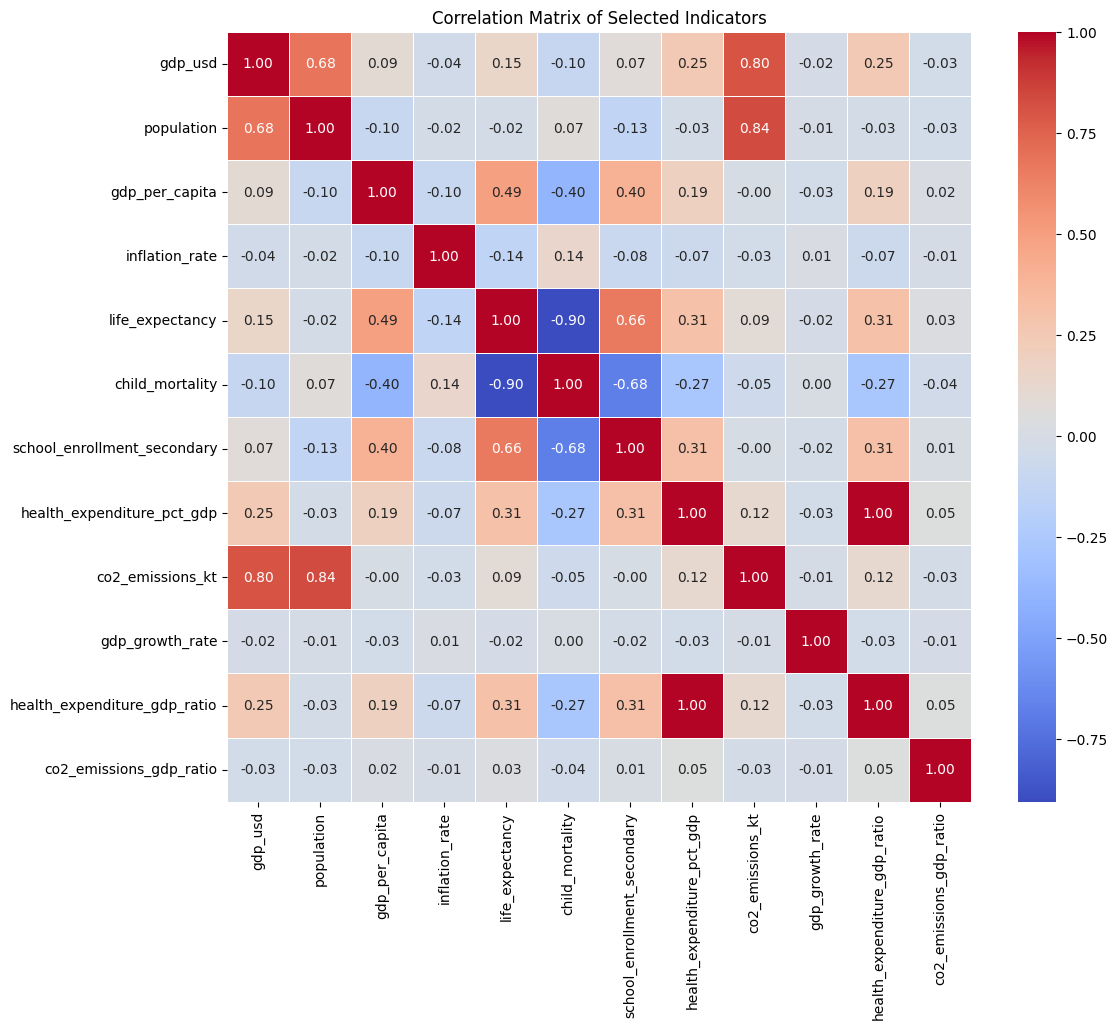

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical features for correlation analysis
numerical_features = ['gdp_usd', 'population', 'gdp_per_capita', 'inflation_rate', 'life_expectancy', 'child_mortality',
                      'school_enrollment_secondary', 'health_expenditure_pct_gdp', 'co2_emissions_kt',
                      'gdp_growth_rate', 'health_expenditure_gdp_ratio', 'co2_emissions_gdp_ratio']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Indicators')
plt.show()

**Reasoning**:
Perform hypothesis testing to investigate statistically significant relationships between pairs of variables.  I will start with a t-test to compare GDP growth rates between different income groups.



In [7]:
from scipy import stats

# Group data by income group
income_groups = df.groupby('income_group')['gdp_growth_rate']

# Perform t-tests between income groups (example: High income vs. Low income)
if 'High income' in income_groups.groups and 'Low income' in income_groups.groups:
    high_income_gdp_growth = income_groups.get_group('High income')
    low_income_gdp_growth = income_groups.get_group('Low income')

    # Remove NaN values before performing the t-test
    high_income_gdp_growth = high_income_gdp_growth.dropna()
    low_income_gdp_growth = low_income_gdp_growth.dropna()

    if len(high_income_gdp_growth) > 0 and len(low_income_gdp_growth) > 0:
        t_statistic, p_value = stats.ttest_ind(high_income_gdp_growth, low_income_gdp_growth)
        print(f"T-test comparing GDP growth rates between High income and Low income groups:")
        print(f"T-statistic: {t_statistic}")
        print(f"P-value: {p_value}")
    else:
        print("Not enough data points in one or both groups to perform a t-test.")
else:
    print("One or both income groups ('High income', 'Low income') are not present in the data.")

T-test comparing GDP growth rates between High income and Low income groups:
T-statistic: 0.8357868083873483
P-value: 0.4033386649788895


**Reasoning**:
Analyze trends over time for key indicators, potentially using grouped analysis by country or region.  I'll analyze the trend in health expenditure as a percentage of GDP over time, broken down by income level.



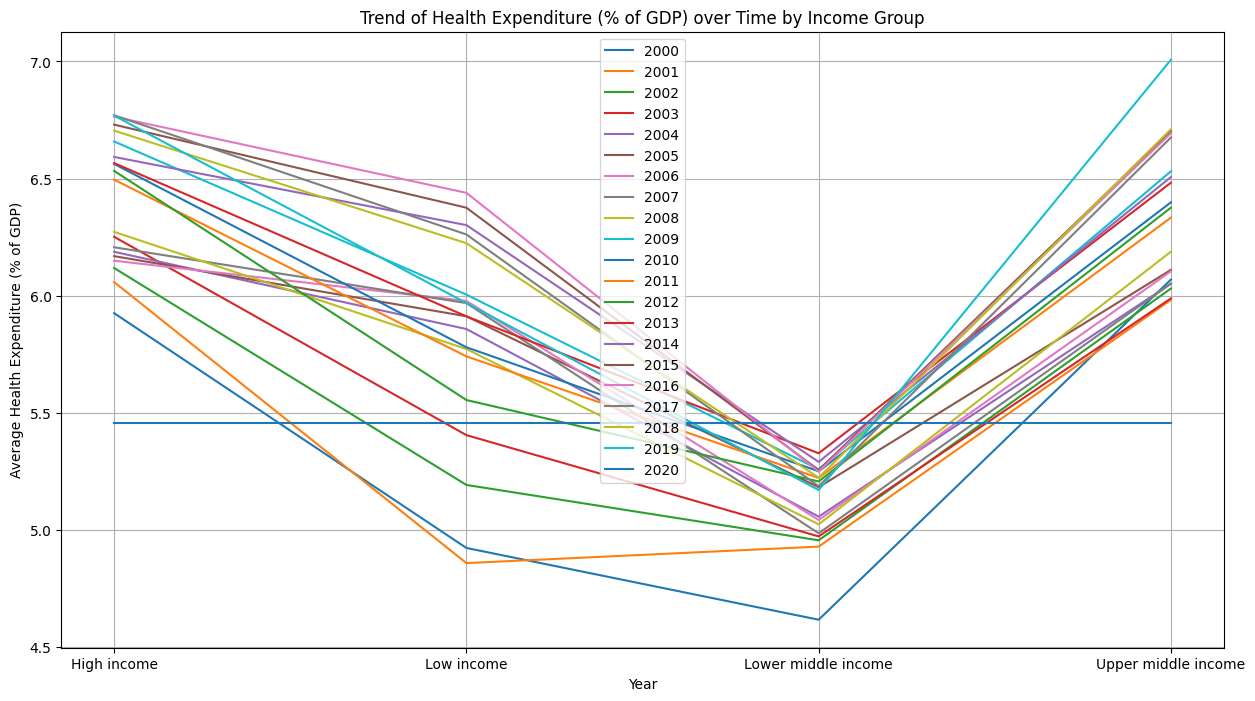

In [8]:
import matplotlib.pyplot as plt

# Group data by income group and year
grouped_data = df.groupby(['income_group', 'year'])['health_expenditure_pct_gdp'].mean().unstack()

# Plot the trends
plt.figure(figsize=(15, 8))
for income_group in grouped_data.columns:
  plt.plot(grouped_data.index, grouped_data[income_group], label=income_group)

plt.xlabel('Year')
plt.ylabel('Average Health Expenditure (% of GDP)')
plt.title('Trend of Health Expenditure (% of GDP) over Time by Income Group')
plt.legend()
plt.grid(True)
plt.show()

## Data visualization

### Subtask:
Visualize key findings from the data analysis.


**Reasoning**:
Create visualizations based on the analysis results, including the correlation matrix heatmap, t-test results bar chart, and health expenditure trend line plot. Save each plot as a PNG image.



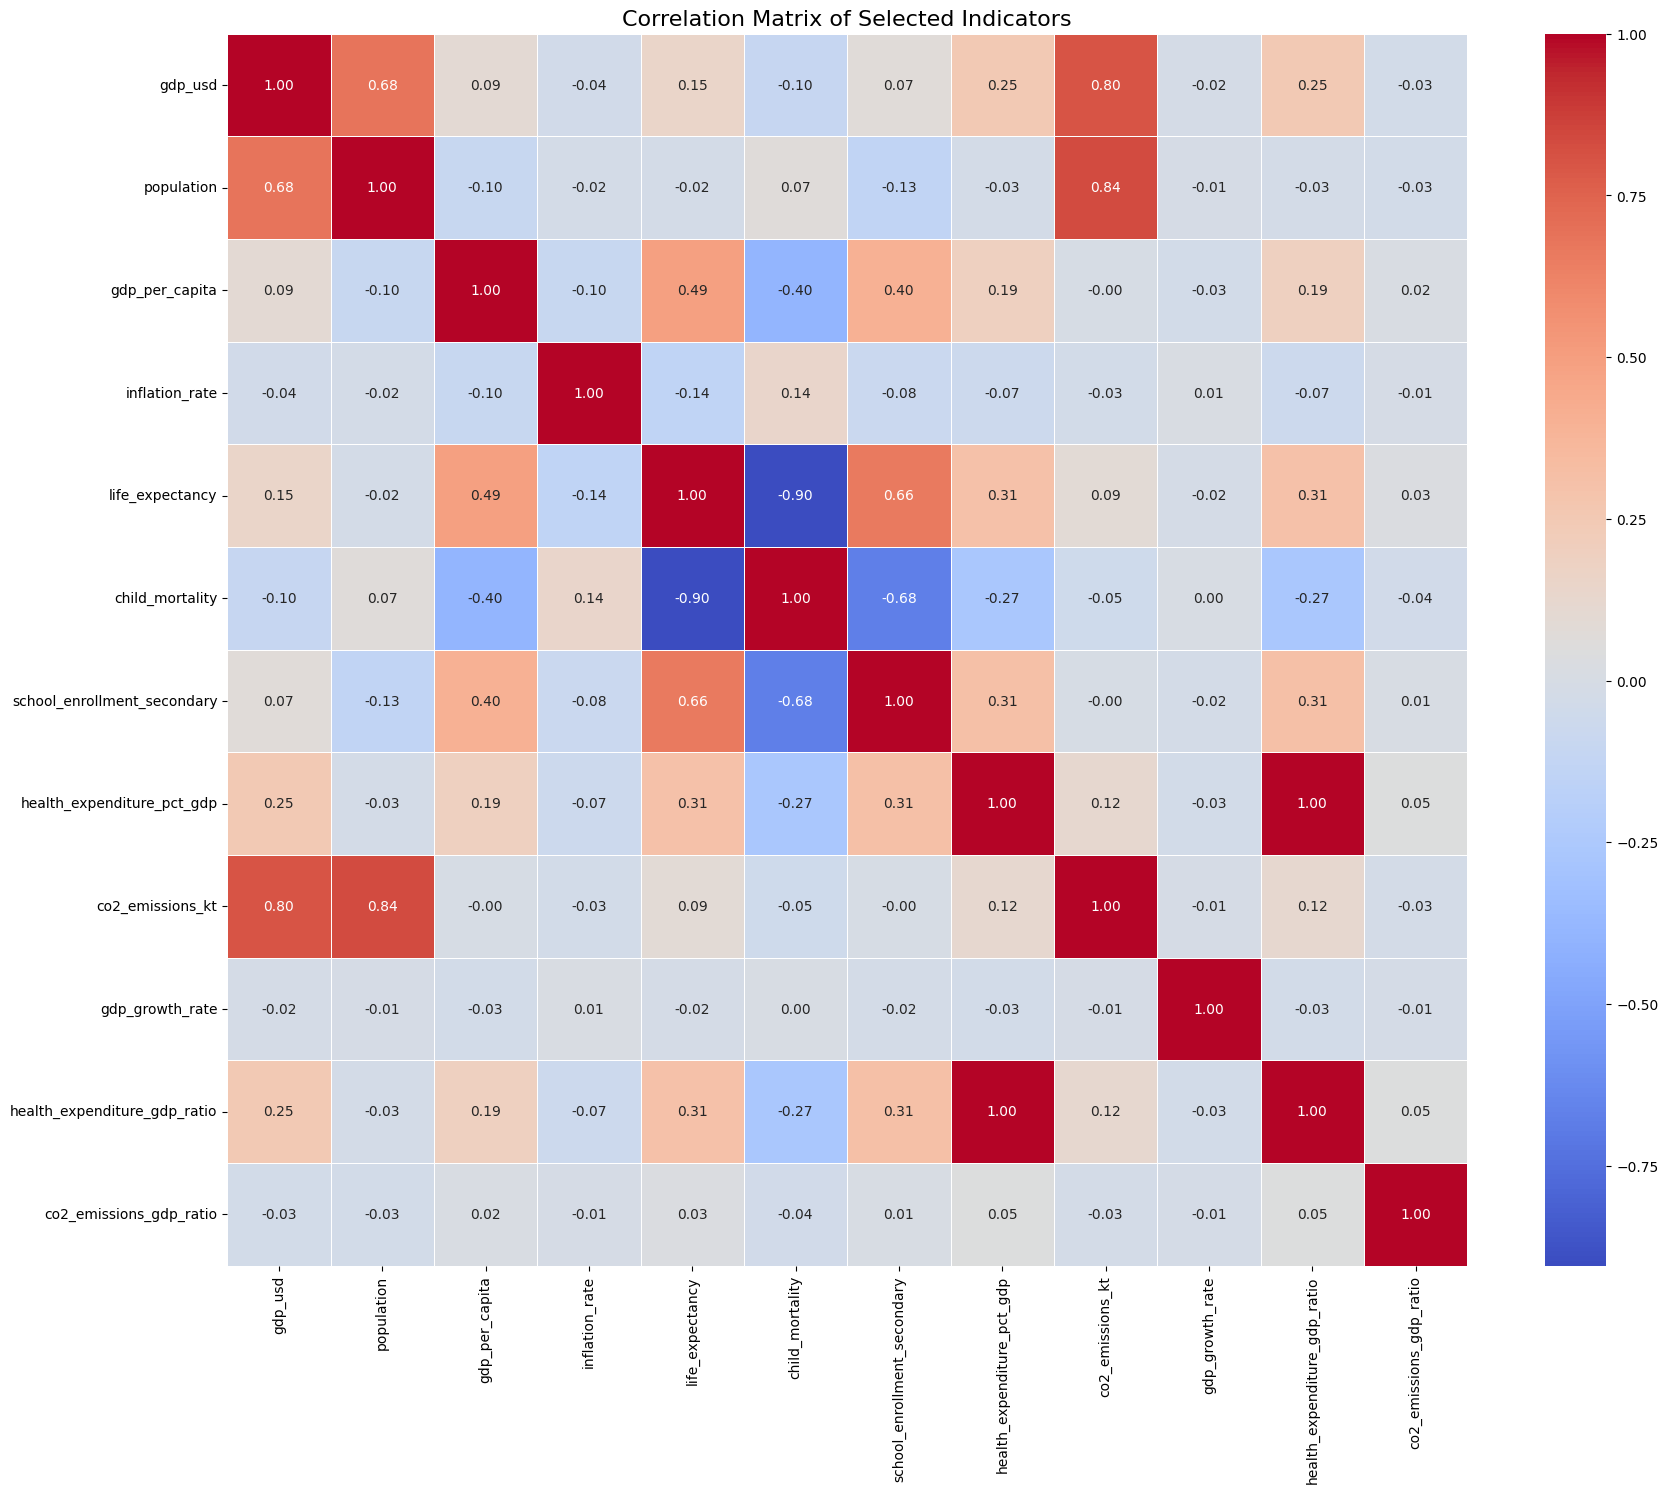

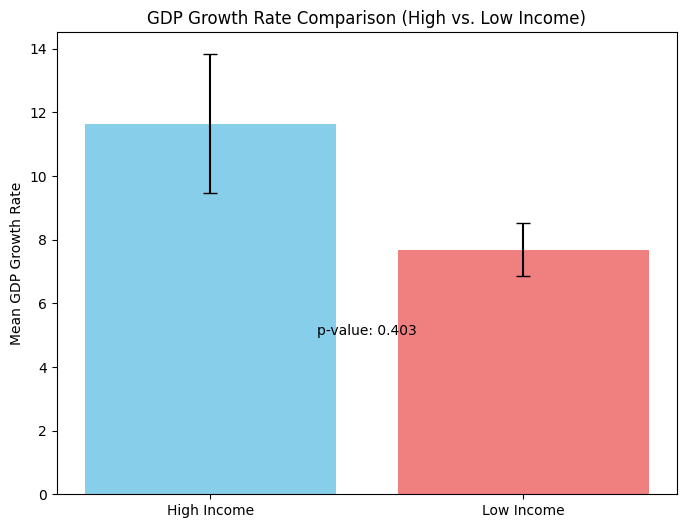

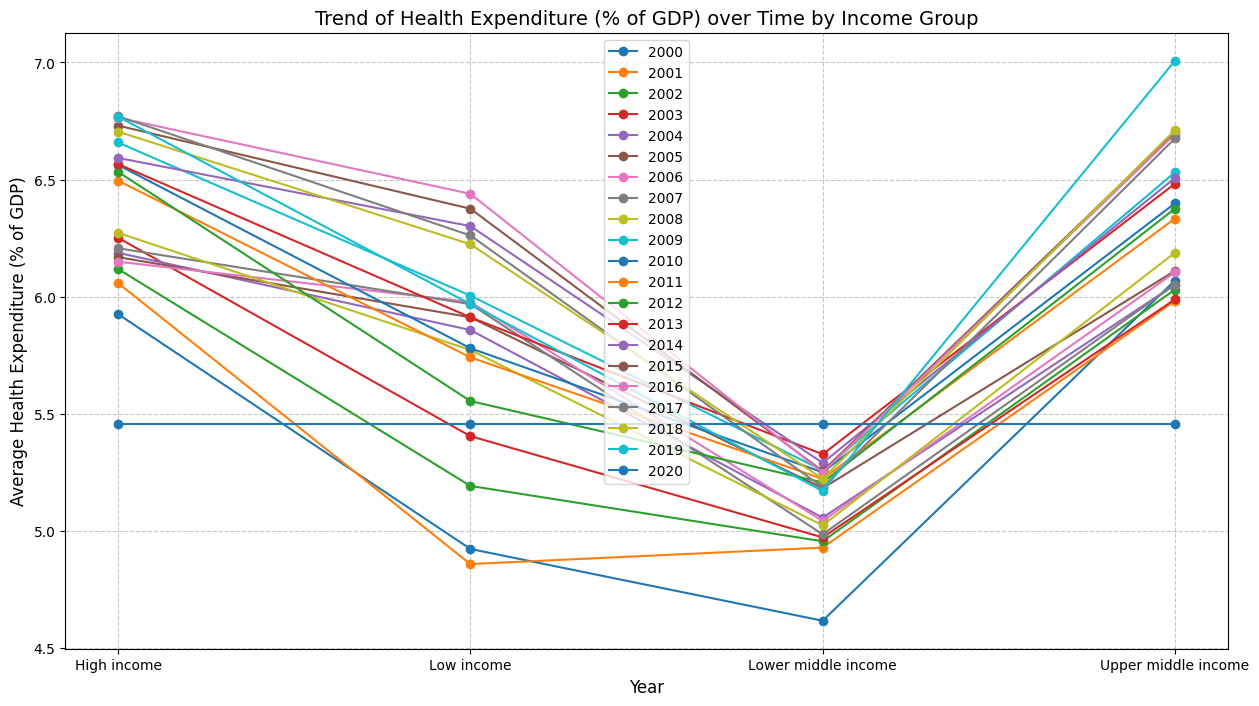

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Correlation matrix heatmap
plt.figure(figsize=(20, 16))  # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Indicators', fontsize=16)
plt.savefig('correlation_matrix_heatmap.png')
plt.show()


# T-test results bar chart
if 'High income' in income_groups.groups and 'Low income' in income_groups.groups:
    high_income_gdp_growth = income_groups.get_group('High income').dropna()
    low_income_gdp_growth = income_groups.get_group('Low income').dropna()

    if len(high_income_gdp_growth) > 0 and len(low_income_gdp_growth) > 0:
        t_statistic, p_value = stats.ttest_ind(high_income_gdp_growth, low_income_gdp_growth)

        means = [high_income_gdp_growth.mean(), low_income_gdp_growth.mean()]
        std_errs = [high_income_gdp_growth.sem(), low_income_gdp_growth.sem()]
        labels = ['High Income', 'Low Income']

        plt.figure(figsize=(8, 6))
        plt.bar(labels, means, yerr=std_errs, capsize=5, color=['skyblue', 'lightcoral'])
        plt.ylabel('Mean GDP Growth Rate')
        plt.title('GDP Growth Rate Comparison (High vs. Low Income)')
        plt.text(0.5, 5, f"p-value: {p_value:.3f}", ha='center')
        plt.savefig('ttest_gdp_growth.png')
        plt.show()
    else:
        print("Not enough data points in one or both groups to perform a t-test.")
else:
    print("One or both income groups ('High income', 'Low income') are not present in the data.")


# Health expenditure trend line plot
plt.figure(figsize=(15, 8))
for income_group in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[income_group], label=income_group, marker='o')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Health Expenditure (% of GDP)', fontsize=12)
plt.title('Trend of Health Expenditure (% of GDP) over Time by Income Group', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('health_expenditure_trend.png')
plt.show()



---

